# Quantum Circuit Design


In [1]:

!pip install Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q =  QuantumRegister(1,"qreg")
c = ClassicalRegister(1,"creg")

qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw()


zsh:1: command not found: pip


┌───┐┌───┐┌─┐
  qreg: ┤ X ├┤ H ├┤M├
        └───┘└───┘└╥┘
creg: 1/═══════════╩═
                   0

<h3>Execute the circuit</h3>


In [2]:
#!pip install qiskit ipywidgets
#!pip install qiskit-ibm-runtime

!pip install qiskit-aer
from qiskit_aer import Aer

backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc)


'''
OLD VERSION
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
'''

# we can get the result of the outcome as follows
counts = job.result().get_counts(qc)
print(counts) # counts is a dictionary

zsh:1: command not found: pip


{'0': 530, '1': 494}


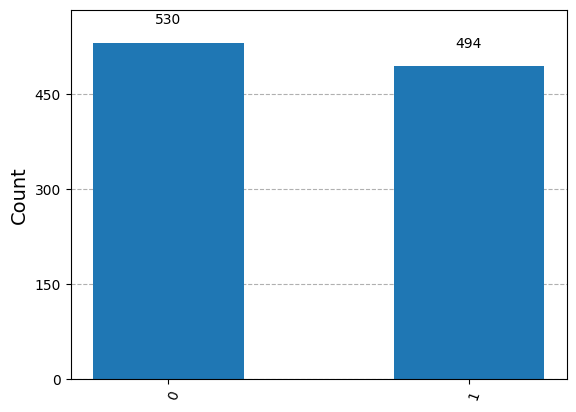

In [3]:

from qiskit.visualization import plot_histogram
plot_histogram(counts)

<h3> Quantum assembly language </h3>


In [4]:
from qiskit import qasm3

print(qasm3.dumps(qc.decompose()))

OPENQASM 3.0;
include "stdgates.inc";
bit[1] creg_0;
qubit[1] qreg_1;
u3(pi, 0, pi) qreg_1[0];
u2(0, pi) qreg_1[0];
creg_0[0] = measure qreg_1[0];



<h3> Quantum circuits with more than one qubit</h3>



In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(q, c)

qc.x(q[0])
qc.x(q[0])

qc.x(q[3])

qc.x(q[2])
qc.x(q[2])
qc.x(q[2])

qc.x(q[1])
qc.x(q[1])
qc.x(q[1])
qc.x(q[1])

qc.barrier()

qc.measure(q, c)


In [16]:
# Display the circuit
print(qc)

     ┌───┐┌───┐           ░ ┌─┐         
q_0: ┤ X ├┤ X ├───────────░─┤M├─────────
     ├───┤├───┤┌───┐┌───┐ ░ └╥┘┌─┐      
q_1: ┤ X ├┤ X ├┤ X ├┤ X ├─░──╫─┤M├──────
     ├───┤├───┤├───┤└───┘ ░  ║ └╥┘┌─┐   
q_2: ┤ X ├┤ X ├┤ X ├──────░──╫──╫─┤M├───
     ├───┤└───┘└───┘      ░  ║  ║ └╥┘┌─┐
q_3: ┤ X ├────────────────░──╫──╫──╫─┤M├
     └───┘                ░  ║  ║  ║ └╥┘
c: 4/════════════════════════╩══╩══╩══╩═
                             0  1  2  3 


Execute the circuit 100 times.

In [17]:
backend = Aer.get_backend('qasm_simulator',shots=100)
job = backend.run(qc)

counts = job.result().get_counts(qc)
print(counts)

{'1100': 1024}


Task 2
Implement one of the Bell states in qiskit.

In [19]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.cx(q[0], q[1])


qc.measure(q, c)

print(qc.draw())

backend = Aer.get_backend('qasm_simulator',shots=100)
job = backend.run(qc)

counts = job.result().get_counts(qc)
print(counts)


     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
{'00': 530, '11': 494}


Implement the following circuit in qiskit with two different type of inputs.


*   First set the first three inputs to different basis states and in all of them set the last qubit to zero.
*   Set the first two qubits to a Bell state and the third qubit to a superposition state and the fourth qubit to zero.



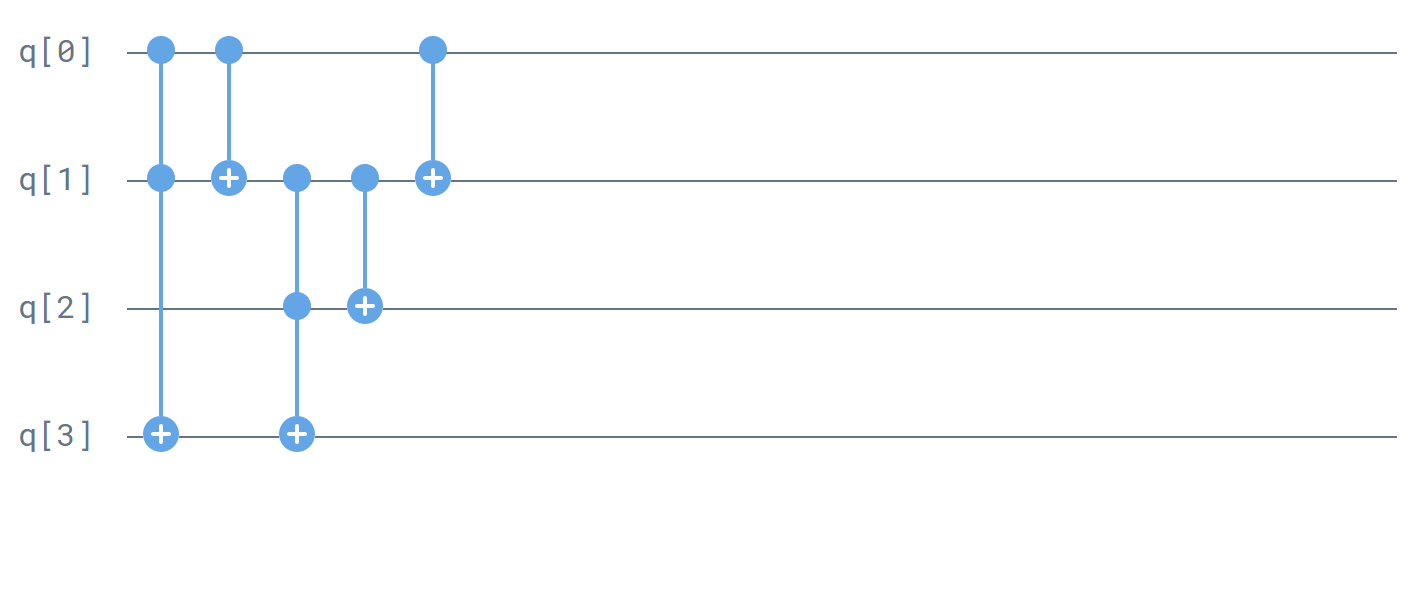

In [29]:
# Import necessary modules from Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit



combinations = [
  [0,0,0],
  [0, 0, 1],
  [0, 1, 0],
  [0, 1, 1],
  [1, 0, 0],
  [1, 0, 1],
  [1, 1, 0],
  [1, 1, 1],
]

for combination in combinations:
  q = QuantumRegister(4, 'q')
  c = ClassicalRegister(4, 'c')
  qc = QuantumCircuit(q, c)

  x1, x2, x3 = combination

  if x1 == 1:
    qc.x(q[0])
  if x2 == 1:
    qc.x(q[1])
  if x3 == 1:
    qc.x(q[2])
  qc.reset(q[3])

  qc.ccx(q[0], q[1], q[3])
  qc.cx(q[0], q[1])
  qc.ccx(q[1], q[2], q[3])
  qc.cx(q[1], q[2])
  qc.cx(q[0], q[1])

  print(qc)



                                   
q_0: ───────■────■──────────────■──
            │  ┌─┴─┐          ┌─┴─┐
q_1: ───────■──┤ X ├──■────■──┤ X ├
            │  └───┘  │  ┌─┴─┐└───┘
q_2: ───────┼─────────■──┤ X ├─────
          ┌─┴─┐     ┌─┴─┐└───┘     
q_3: ─|0>─┤ X ├─────┤ X ├──────────
          └───┘     └───┘          
c: 4/══════════════════════════════
                                   
                                   
q_0: ───────■────■──────────────■──
            │  ┌─┴─┐          ┌─┴─┐
q_1: ───────■──┤ X ├──■────■──┤ X ├
     ┌───┐  │  └───┘  │  ┌─┴─┐└───┘
q_2: ┤ X ├──┼─────────■──┤ X ├─────
     └───┘┌─┴─┐     ┌─┴─┐└───┘     
q_3: ─|0>─┤ X ├─────┤ X ├──────────
          └───┘     └───┘          
c: 4/══════════════════════════════
                                   
                                   
q_0: ───────■────■──────────────■──
     ┌───┐  │  ┌─┴─┐          ┌─┴─┐
q_1: ┤ X ├──■──┤ X ├──■────■──┤ X ├
     └───┘  │  └───┘  │  ┌─┴─┐└───┘
q_2: ───────┼─────────■──┤ X

In [27]:
# Import necessary modules from Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')

qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.cx(q[0], q[1])

qc.h(q[2])
qc.reset(q[3])

qc.ccx(q[0], q[1], q[3])
qc.cx(q[0], q[1])
qc.ccx(q[1], q[2], q[3])
qc.cx(q[1], q[2])
qc.cx(q[0], q[1])

print(qc)



     ┌───┐                              
q_0: ┤ H ├──■────■────■──────────────■──
     └───┘┌─┴─┐  │  ┌─┴─┐          ┌─┴─┐
q_1: ─────┤ X ├──■──┤ X ├──■────■──┤ X ├
     ┌───┐└───┘  │  └───┘  │  ┌─┴─┐└───┘
q_2: ┤ H ├───────┼─────────■──┤ X ├─────
     └───┘     ┌─┴─┐     ┌─┴─┐└───┘     
q_3: ─|0>──────┤ X ├─────┤ X ├──────────
               └───┘     └───┘          
c: 4/═══════════════════════════════════
                                        


<h3> Run your quantum computations on real hardware </h3>


In [30]:
!pip install qiskit-ibm-provider

from qiskit_ibm_provider import IBMProvider

IBMProvider.save_account(token='50c761015e571b02392f1d9e11e8c24c11f02debd492b2411c43825edf789e8d277b31cd6de6fbd2f53b79c1c81f4dc7f689bf431d335deba24f22cf47d420bb', overwrite=True)
provider = IBMProvider()

zsh:1: command not found: pip


ModuleNotFoundError: No module named 'qiskit_ibm_provider'

In [24]:
backend_name = "ibm_brisbane"
backend = provider.get_backend(backend_name)

In [25]:
from qiskit import transpile

#qc_transpiled = transpile(qc, backend)
#job = backend.run(qc_transpiled, shots=1000)
job = backend.run(qc, shots=1000)

In [26]:
#counts = job.result().get_counts()

#plot_histogram(counts)